# Baseline Model

## Table of Contents
1. Model Choice
2. Feature Selection
3. Baseline Model Implementation
4. Evaluation


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

## Model Choice

Linear Regression is a good baseline for sales forecasting because it’s simple, fast, and interpretable, modeling sales as a straightforward linear function of input features. It often captures basic trends well and provides a clear benchmark to compare more complex models against, helping to quickly assess whether advanced techniques are needed.

## Feature Selection

Features used for the baseline model: 
- KielerWocher: To determine how a festival influences sales
- Product Groups (1 to 6): To determine which product group is best/least sold
- Day of the week (weekday_sin, weekday_cos): To determine weekly sale cycles
- Month of the year (month_sin, month_cos): To determine yearly sale cycles
- is_off (if a day is a weeknd or holiday): To determine how days off influence sales cycles


In [17]:
train_df = pd.read_csv('../1_DatasetCharacteristics/train_df_for_modeling.csv')
test_df = pd.read_csv('../1_DatasetCharacteristics/test_df_for_modeling.csv')
test_id = pd.read_csv('../1_DatasetCharacteristics/test_id_for_modeling.csv')

In [47]:
test_id

,id
0,1808011
1,1808013
2,1808014
3,1808015
4,1808012
...,...
1825,1907301
1826,1907302
1827,1907305
1828,1907304


In [18]:
# Split Training set from 01.07.2013 to 31.07.2017
training_start_date = '2013-07-01'
training_end_date = '2017-07-31'
# Split Validation set from 01.08.2017 to 31.07.2018
validation_start_date = '2017-08-01'
validation_end_date = '2018-07-31'

In [19]:
df_train_split = train_df[(train_df['Datum'] >= training_start_date) & (train_df['Datum'] <= training_end_date)].copy()

In [20]:
df_train_split

,id,Datum,Umsatz,KielerWoche,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,weekday_sin,weekday_cos,month_sin,month_cos,is_off
0,1307011,2013-07-01,148.828353,0,1,0,0,0,0,0,0.0,1.0,-0.5,-0.866025,0
1,1307013,2013-07-01,201.198426,0,0,0,1,0,0,0,0.0,1.0,-0.5,-0.866025,0
2,1307015,2013-07-01,317.475875,0,0,0,0,0,1,0,0.0,1.0,-0.5,-0.866025,0
3,1307012,2013-07-01,535.856285,0,0,1,0,0,0,0,0.0,1.0,-0.5,-0.866025,0
4,1307014,2013-07-01,65.890169,0,0,0,0,1,0,0,0.0,1.0,-0.5,-0.866025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,1707311,2017-07-31,162.425333,0,1,0,0,0,0,0,0.0,1.0,-0.5,-0.866025,0
7489,1707313,2017-07-31,294.721801,0,0,0,1,0,0,0,0.0,1.0,-0.5,-0.866025,0
7490,1707315,2017-07-31,222.684256,0,0,0,0,0,1,0,0.0,1.0,-0.5,-0.866025,0
7491,1707312,2017-07-31,548.102447,0,0,1,0,0,0,0,0.0,1.0,-0.5,-0.866025,0


In [21]:
df_validation_split = train_df[(train_df['Datum'] >= validation_start_date) & (train_df['Datum'] <= validation_end_date)].copy()

In [22]:
df_validation_split

,id,Datum,Umsatz,KielerWoche,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,weekday_sin,weekday_cos,month_sin,month_cos,is_off
7493,1708013,2017-08-01,294.872701,0,0,0,1,0,0,0,0.781831,0.62349,-0.866025,-0.500000,0
7494,1708012,2017-08-01,557.470898,0,0,1,0,0,0,0,0.781831,0.62349,-0.866025,-0.500000,0
7495,1708011,2017-08-01,166.135486,0,1,0,0,0,0,0,0.781831,0.62349,-0.866025,-0.500000,0
7496,1708014,2017-08-01,88.208006,0,0,0,0,1,0,0,0.781831,0.62349,-0.866025,-0.500000,0
7497,1708015,2017-08-01,325.864228,0,0,0,0,0,1,0,0.781831,0.62349,-0.866025,-0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,1807315,2018-07-31,261.341313,0,0,0,0,0,1,0,0.781831,0.62349,-0.500000,-0.866025,0
9330,1807311,2018-07-31,123.075682,0,1,0,0,0,0,0,0.781831,0.62349,-0.500000,-0.866025,0
9331,1807313,2018-07-31,285.872616,0,0,0,1,0,0,0,0.781831,0.62349,-0.500000,-0.866025,0
9332,1807312,2018-07-31,586.081666,0,0,1,0,0,0,0,0.781831,0.62349,-0.500000,-0.866025,0


In [23]:
X_train = df_train_split.drop(columns=['id', 'Datum', 'Umsatz'])

In [24]:
X_train

,KielerWoche,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,weekday_sin,weekday_cos,month_sin,month_cos,is_off
0,0,1,0,0,0,0,0,0.0,1.0,-0.5,-0.866025,0
1,0,0,0,1,0,0,0,0.0,1.0,-0.5,-0.866025,0
2,0,0,0,0,0,1,0,0.0,1.0,-0.5,-0.866025,0
3,0,0,1,0,0,0,0,0.0,1.0,-0.5,-0.866025,0
4,0,0,0,0,1,0,0,0.0,1.0,-0.5,-0.866025,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7488,0,1,0,0,0,0,0,0.0,1.0,-0.5,-0.866025,0
7489,0,0,0,1,0,0,0,0.0,1.0,-0.5,-0.866025,0
7490,0,0,0,0,0,1,0,0.0,1.0,-0.5,-0.866025,0
7491,0,0,1,0,0,0,0,0.0,1.0,-0.5,-0.866025,0


In [25]:
Y_train = df_train_split['Umsatz']

In [26]:
Y_train

0       148.828353
1       201.198426
2       317.475875
3       535.856285
4        65.890169
           ...    
7488    162.425333
7489    294.721801
7490    222.684256
7491    548.102447
7492     87.226479
Name: Umsatz, Length: 7493, dtype: float64

## Baseline Model Implementation

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
coefficients = pd.Series(model.coef_, index=X_train.columns)
most_influential = coefficients.abs().sort_values(ascending=False)
print(most_influential)

Warengruppe_2    217.831037
Warengruppe_4    104.488497
Warengruppe_6    101.421007
Warengruppe_5     88.126678
Warengruppe_1     71.427925
is_off            50.944983
month_cos         32.739142
Warengruppe_3     28.620286
month_sin         28.086884
KielerWoche        6.224137
weekday_sin        3.243375
weekday_cos        0.886550
dtype: float64


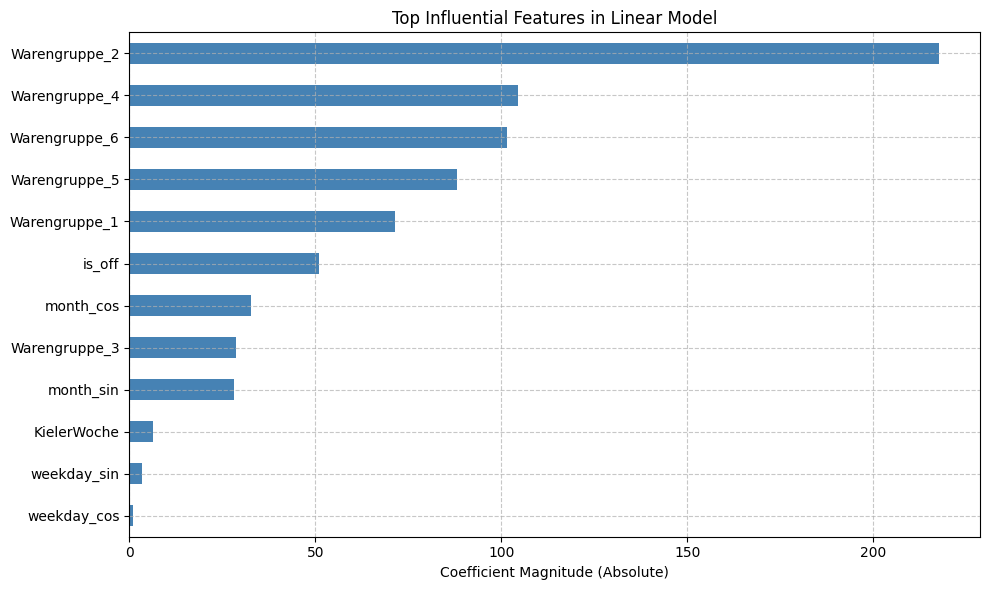

In [31]:
# Compute coefficients
coefficients = pd.Series(model.coef_, index=X_train.columns)
most_influential = coefficients.abs().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
most_influential.head(20).plot(kind='barh', color='steelblue')  # top 20 by absolute value
plt.gca().invert_yaxis()  # largest on top
plt.xlabel('Coefficient Magnitude (Absolute)')
plt.title('Top Influential Features in Linear Model')

# Add both horizontal and vertical grid lines
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [32]:
#Model Equation
equation = "Umsatz = {:.2f}".format(model.intercept_)
for feature, coef in zip(X_train.columns, model.coef_):
    equation += " + {:.2f} * {}".format(coef, feature) 
print(equation) 

Umsatz = 176.30 + 6.22 * KielerWoche + -71.43 * Warengruppe_1 + 217.83 * Warengruppe_2 + -28.62 * Warengruppe_3 + -104.49 * Warengruppe_4 + 88.13 * Warengruppe_5 + -101.42 * Warengruppe_6 + -3.24 * weekday_sin + -0.89 * weekday_cos + -28.09 * month_sin + -32.74 * month_cos + 50.94 * is_off


In [35]:
import statsmodels.api as sm

# Add constant term for intercept
X_train_sm = sm.add_constant(X_train)

# Fit OLS model
model = sm.OLS(Y_train, X_train_sm).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1767.
Date:                Sat, 26 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:48:08   Log-Likelihood:                -43268.
No. Observations:                7493   AIC:                         8.656e+04
Df Residuals:                    7481   BIC:                         8.664e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.994e+14   1.69e+14      1.181

## Evaluation

**Metrics used: R² and MAPE**

In [36]:
print("R²:", model.rsquared)
print("Adjusted R²:", model.rsquared_adj)
print("Coefficients:")
print(model.params)

R²: 0.7220285099912921
Adjusted R²: 0.7216197830309798
Coefficients:
const            1.993584e+14
KielerWoche      6.399814e+00
Warengruppe_1   -1.993584e+14
Warengruppe_2   -1.993584e+14
Warengruppe_3   -1.993584e+14
Warengruppe_4   -1.993584e+14
Warengruppe_5   -1.993584e+14
Warengruppe_6   -1.993584e+14
weekday_sin     -3.128739e+00
weekday_cos     -9.354766e-01
month_sin       -2.807101e+01
month_cos       -3.270434e+01
is_off           5.105123e+01
dtype: float64


In [38]:
X_val = df_validation_split.drop(columns=['id', 'Datum', 'Umsatz'])

In [39]:
X_val

,KielerWoche,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,weekday_sin,weekday_cos,month_sin,month_cos,is_off
7493,0,0,0,1,0,0,0,0.781831,0.62349,-0.866025,-0.500000,0
7494,0,0,1,0,0,0,0,0.781831,0.62349,-0.866025,-0.500000,0
7495,0,1,0,0,0,0,0,0.781831,0.62349,-0.866025,-0.500000,0
7496,0,0,0,0,1,0,0,0.781831,0.62349,-0.866025,-0.500000,0
7497,0,0,0,0,0,1,0,0.781831,0.62349,-0.866025,-0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9329,0,0,0,0,0,1,0,0.781831,0.62349,-0.500000,-0.866025,0
9330,0,1,0,0,0,0,0,0.781831,0.62349,-0.500000,-0.866025,0
9331,0,0,0,1,0,0,0,0.781831,0.62349,-0.500000,-0.866025,0
9332,0,0,1,0,0,0,0,0.781831,0.62349,-0.500000,-0.866025,0


In [40]:
Y_val = df_validation_split['Umsatz']

In [41]:
Y_val

7493    294.872701
7494    557.470898
7495    166.135486
7496     88.208006
7497    325.864228
           ...    
9329    261.341313
9330    123.075682
9331    285.872616
9332    586.081666
9333     57.102795
Name: Umsatz, Length: 1841, dtype: float64

In [42]:
X_val_sm = sm.add_constant(X_val)
y_pred_val = model.predict(X_val_sm)

In [43]:
mape = mean_absolute_percentage_error(Y_val, y_pred_val)
print(f"Validation MAPE: {mape:.2f}")

Validation MAPE: 0.33


In [44]:
test_df_sm = sm.add_constant(test_df)
test_predictions = model.predict(test_df_sm)

In [45]:
test_predictions 

0       143.851497
1       185.976497
2       108.281250
3       303.476497
4       432.218750
           ...    
1825    145.360137
1826    433.718750
1827    304.985137
1828    109.781250
1829    187.485137
Length: 1830, dtype: float64

In [50]:
baseline_model_submission = pd.DataFrame({'id': test_id.squeeze(), 'umsatz': test_predictions})

In [51]:
baseline_model_submission

,id,umsatz
0,1808011,143.851497
1,1808013,185.976497
2,1808014,108.281250
3,1808015,303.476497
4,1808012,432.218750
...,...,...
1825,1907301,145.360137
1826,1907302,433.718750
1827,1907305,304.985137
1828,1907304,109.781250


In [52]:
baseline_model_submission.to_csv('baseline_model_submission.csv', index=False)

In [53]:
X_train.to_csv('x_train.csv', index=False)
Y_train.to_csv('y_train.csv', index=False)

X_val.to_csv('x_val.csv', index=False)
Y_val.to_csv('y_val.csv', index=False)

In [54]:
df_validation_split.to_csv('df_validation_split.csv', index=False)